# Assignment6: Random Forest

Problem Statement:

Refer Ad Click Prediction Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using random forest. Analyse the performance of model with suitable evaluation measures and try to enhance the performance.

# Loading and Setting the datasets

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data=pd.read_csv(r"C:\Users\ds3\Downloads\Ad Click Data.csv")
data.head(60)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1.0,Norway,5/19/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0.0,Myanmar,1/28/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1.0,Australia,3/7/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1.0,Grenada,4/18/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1.0,Ghana,7/11/2016 1:42,0


In [58]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [60]:
data.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [61]:
data=data.dropna()

In [62]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [63]:
data=data.drop(['Timestamp','Ad Topic Line','City','Country'],axis=1)

# <font color=green >Data Description</font>

Daily Time Spent on Site: We see users spend between 32 min to 91 min on the site with a mean value of 65min, which is quite a large amount of time. This indicates that it is a popular site. We would like to see if there is any corellation with time spend on the site and 'clicked on Ad'.

Age: The user age ranges from 19years to 61 years with a mean of 36 years, which tells us that the target users are adults.

Area Income: The minimum users income is around 13k and the maximum user income is 79k, which tells us that the users belongs to different social classes. We would like to further investigate how the income is corelates with the click on the ad.

Daily Internet Usage: The daily internet use ranges from 104min to 269min. Out of total daily internet use, users spend quite a large amount of time on the site, which ranges from 32 to 91 min. We will check if they both are relates to each other in some way.

Male: 48% of the users are male. We will check if gender affects the rate of click on the ad.

Clicked on Ad: From the cell above and the cell below, we see that 50% of the ads were clicked and 50% of the ad weren't clicked by the user. Which tells us that our ad dataset is balanced, which will have a positive affect on training accuracy.

# <font color=green>Visualization</font>

# <font color =red> Count Plot of Clicked on Ad </font>

In [64]:
x=data['Clicked on Ad'].value_counts()
x

1    477
0    476
Name: Clicked on Ad, dtype: int64

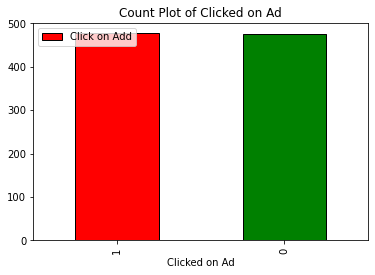

In [65]:
x.plot(kind='bar',color=('red','green'),edgecolor='black')
plt.title('Count Plot of Clicked on Ad')
plt.xlabel('Clicked on Ad')
label=['Click on Add','Dont Click On Add']
plt.legend(label,loc=2)
plt.show()

Count of users click on Ad and count of users those don't click on Ad are Approximately Equal 
meand our target variable is balanced

# <font color=green> Bar Graph Of Clicked on Ad vs Male </font> 

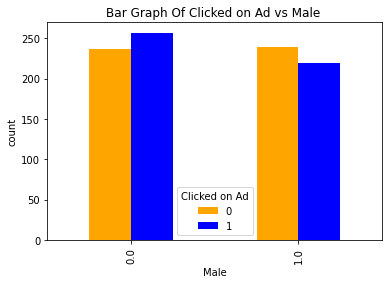

In [66]:
pd.crosstab(data.Male,data['Clicked on Ad']).plot(kind='bar',color=('orange','Blue'))
plt.title('Bar Graph Of Clicked on Ad vs Male ')
plt.xlabel('Male')
plt.ylabel('count')
plt.show()

From Above graph we can say that the count of female users who click on ad are more than male users

# Line Plot of Area Income and Daily time spent  with respective to Click on Ad

<AxesSubplot:xlabel='Area Income', ylabel='Daily Time Spent on Site'>

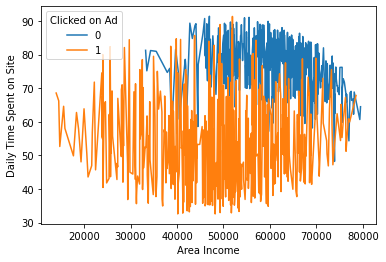

In [67]:
sns.lineplot(data=data, x="Area Income", y="Daily Time Spent on Site", hue="Clicked on Ad")

from above graph we can say that the users who spent less time on site and has high income tend to click on ad.
and the users who spent more time on site and has high income does not seem to click on ad.

# Line Plot of Age and Daily time spent with respective to Click on Ad

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

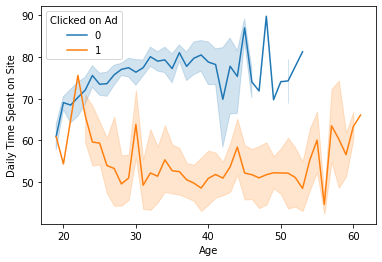

In [68]:
sns.lineplot(data=data, x="Age", y="Daily Time Spent on Site", hue="Clicked on Ad")

from above plot it is clear that the group of users who spent more time on site does not seem to click on ad this users 
age is between 20 to 50. and the users who dont spend more time on site are tend to click on ad.

# Count Plot of Age

<AxesSubplot:xlabel='Age', ylabel='count'>

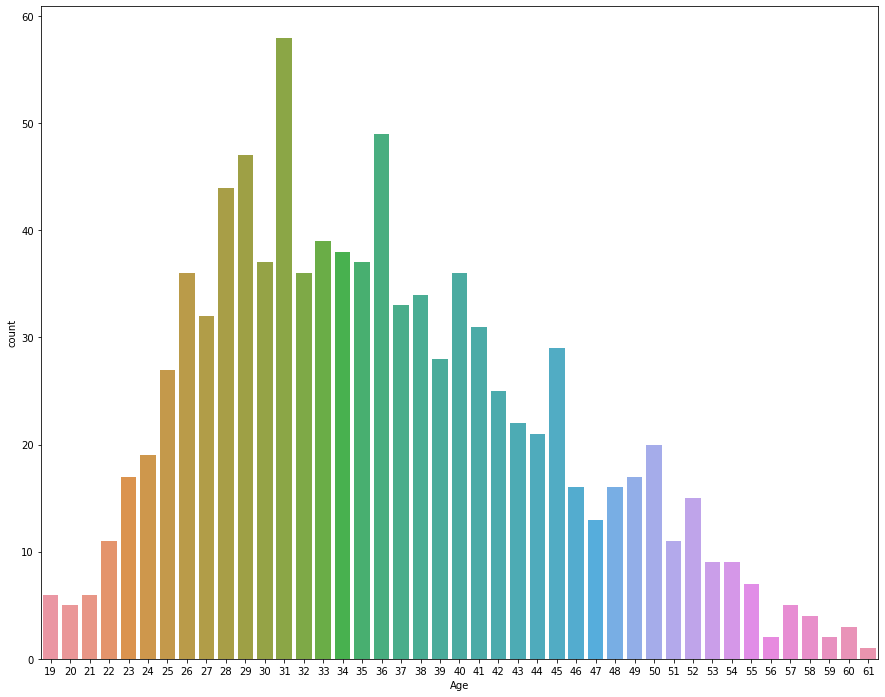

In [69]:
fig,ax = plt.subplots(figsize=(15,12))
sns.countplot(x ='Age', data = data,ax=ax)

from above plot we clearly observed that majority of users are in the age range 25-40

# Bar Plot of Age vs Clicked on Ad

<AxesSubplot:xlabel='Age', ylabel='count'>

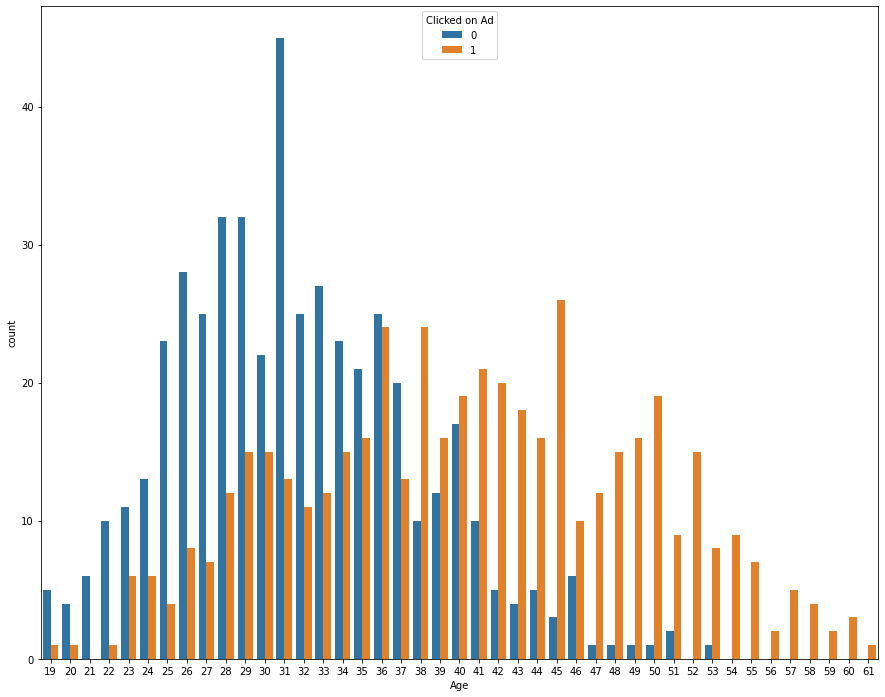

In [70]:
fig, ax = plt.subplots(figsize=(15,12))
sns.countplot(x ='Age',hue="Clicked on Ad", data = data,ax=ax)

 users of age range 19 to 35 does not seem to clicked on Ad.and the users of age range 35 to 61 tend to click on Ad.

# Model Fitting

In [71]:
data


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,0
1,80.23,31,68441.85,193.77,1.0,0
2,69.47,26,59785.94,236.50,0.0,0
3,74.15,29,54806.18,245.89,1.0,0
4,68.37,35,73889.99,225.58,0.0,0
...,...,...,...,...,...,...
993,64.20,27,66200.96,227.63,1.0,0
995,72.97,30,71384.57,208.58,1.0,1
996,51.30,45,67782.17,134.42,1.0,1
998,55.55,19,41920.79,187.95,0.0,0


In [72]:
x=data.drop(['Clicked on Ad'],axis=1)
y=data['Clicked on Ad']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model=RandomForestClassifier(n_estimators=100,max_depth=5)

In [114]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [123]:
estimator = model.estimators_[50]

In [116]:
y_pred=model.predict(x_test)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
confusion_matrix(y_test,y_pred)

array([[95,  3],
       [ 5, 88]], dtype=int64)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96        93

    accuracy                           0.96       191
   macro avg       0.96      0.96      0.96       191
weighted avg       0.96      0.96      0.96       191



In [120]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9581151832460733

So from Above confusion matrix and classification report we can say that our model give good result on testing datasets.
so random forest classifier is suitable for our datasets.

# Decision Tree

In [121]:
from sklearn.tree import plot_tree

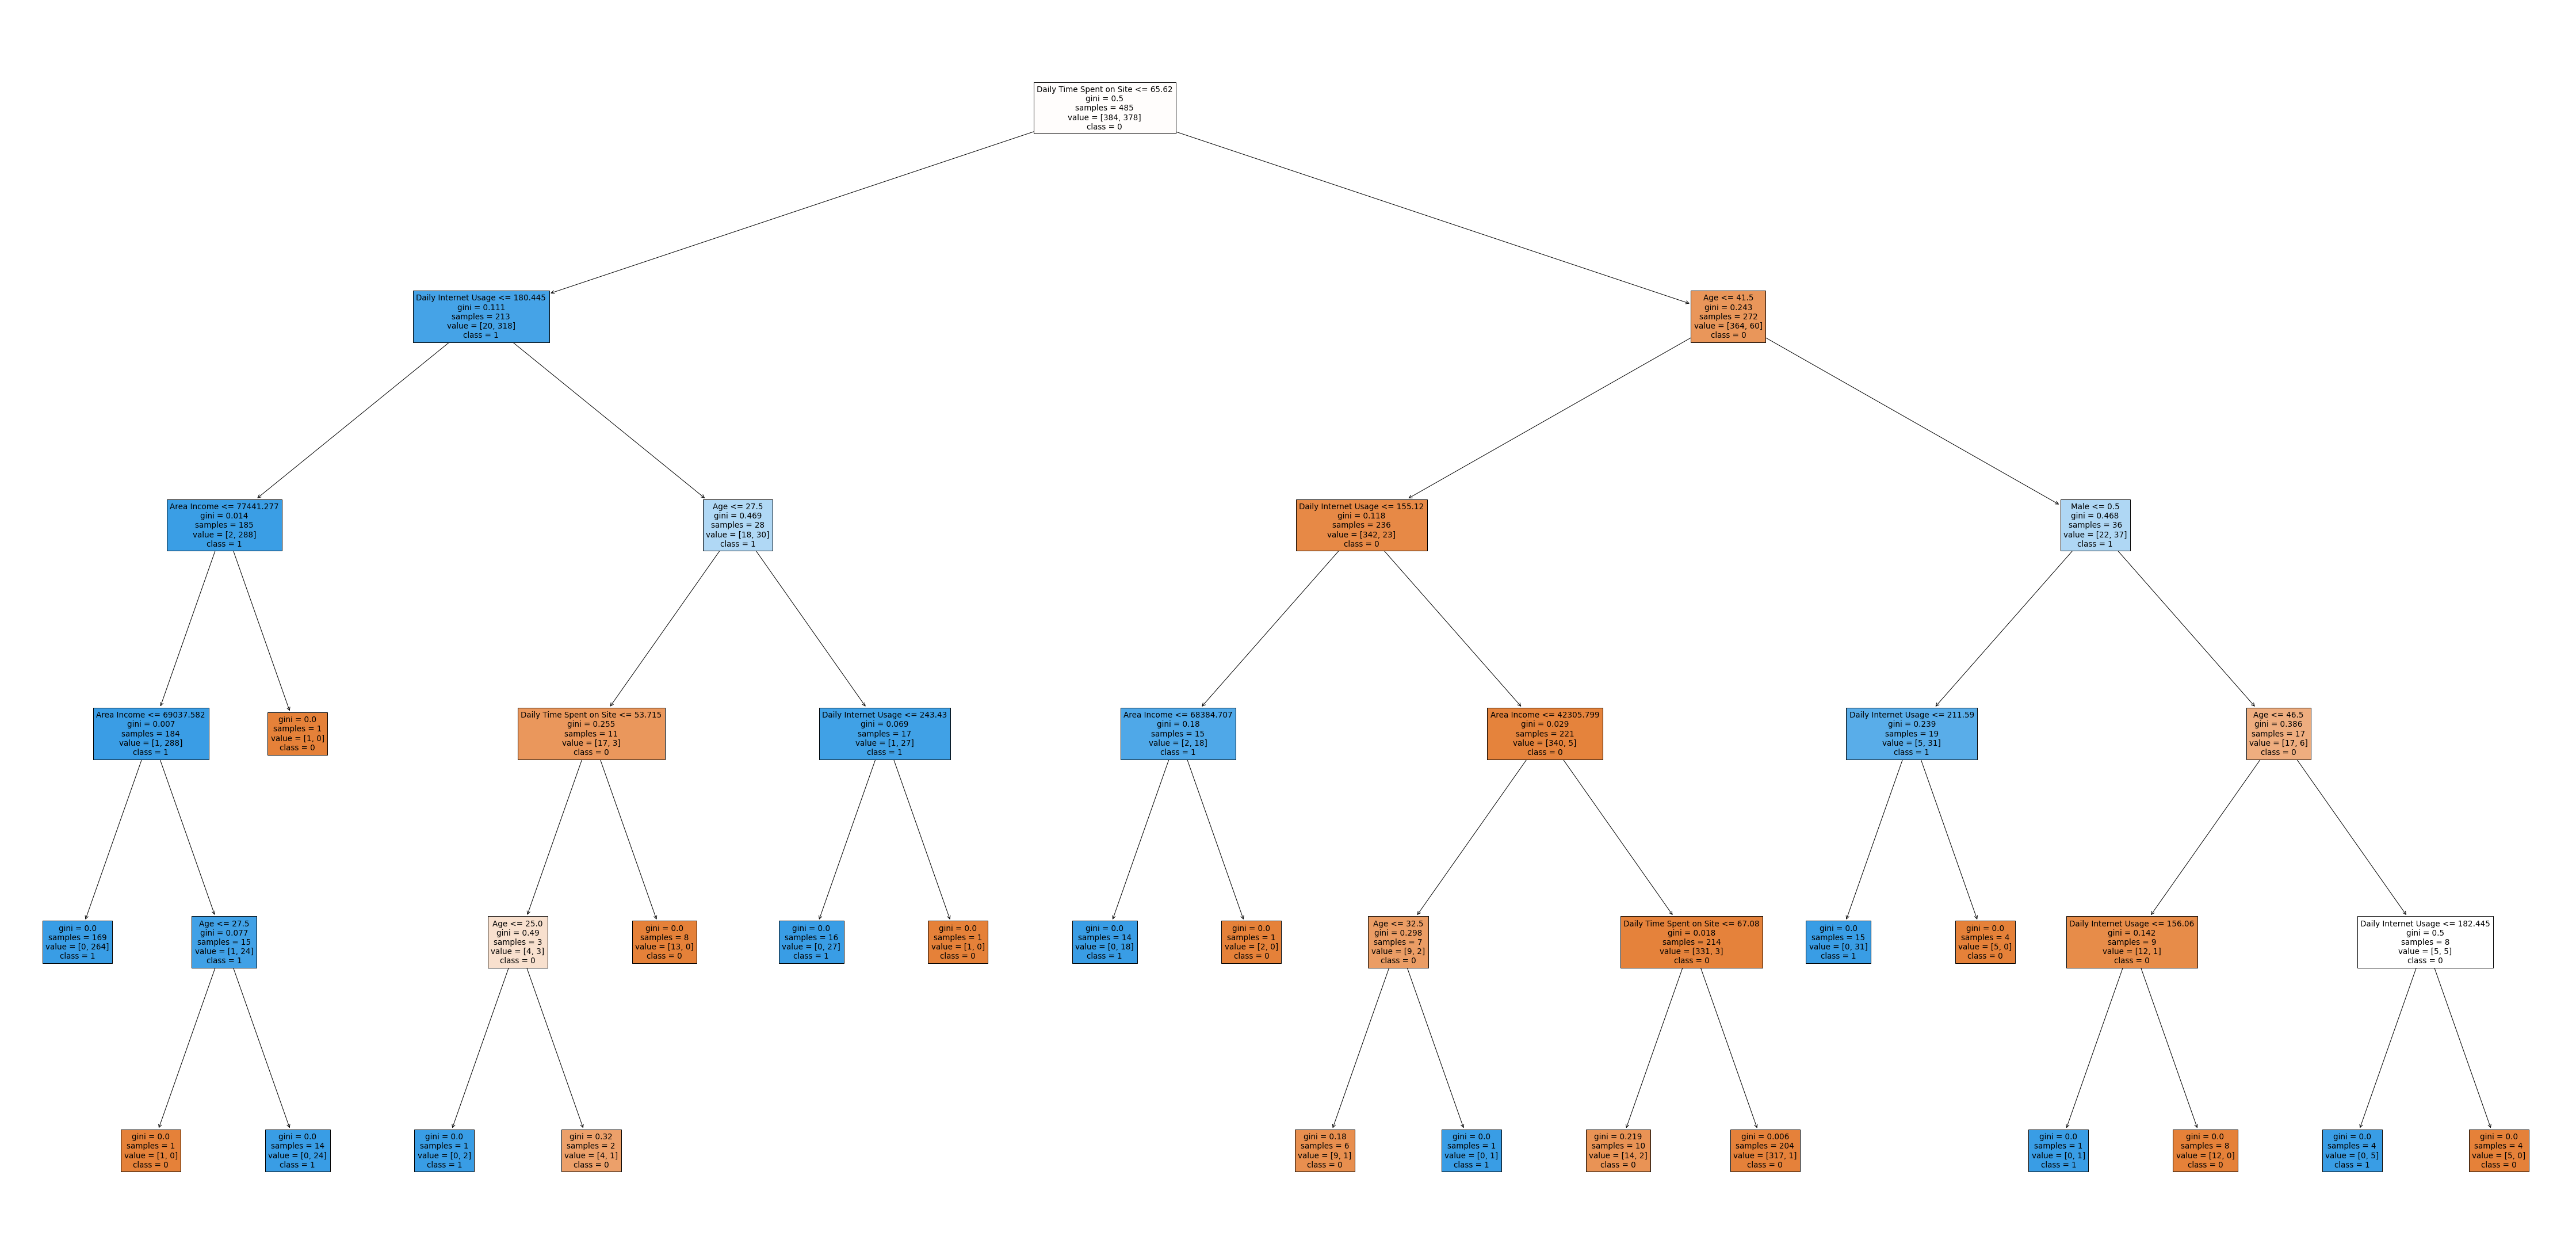

In [124]:
plt.figure(figsize=(80,40))
plot_tree(estimator,
          feature_names=x_train.columns
          ,class_names=['0','1']
          ,filled=True
         );
plt.savefig('tree.png',dpi=300)